In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r'C:\Users\hp\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\hp\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\hp\Downloads\Transactions.csv')

print("Customers DataFrame:")
print(customers.head())
print(customers.info())

print("\nProducts DataFrame:")
print(products.head())
print(products.info())

print("\nTransactions DataFrame:")
print(transactions.head())
print(transactions.info())


Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiv

In [2]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

# Handling missing values 
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)



Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [3]:
# statistics
print("\nCustomers Descriptive Statistics:")
print(customers.describe(include='all'))

print("\nProducts Descriptive Statistics:")
print(products.describe(include='all'))

print("\nTransactions Descriptive Statistics:")
print(transactions.describe(include='all'))



Customers Descriptive Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Descriptive Statistics:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%   

In [6]:
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['TotalValue'] = transactions['Quantity'] * transactions['Price']


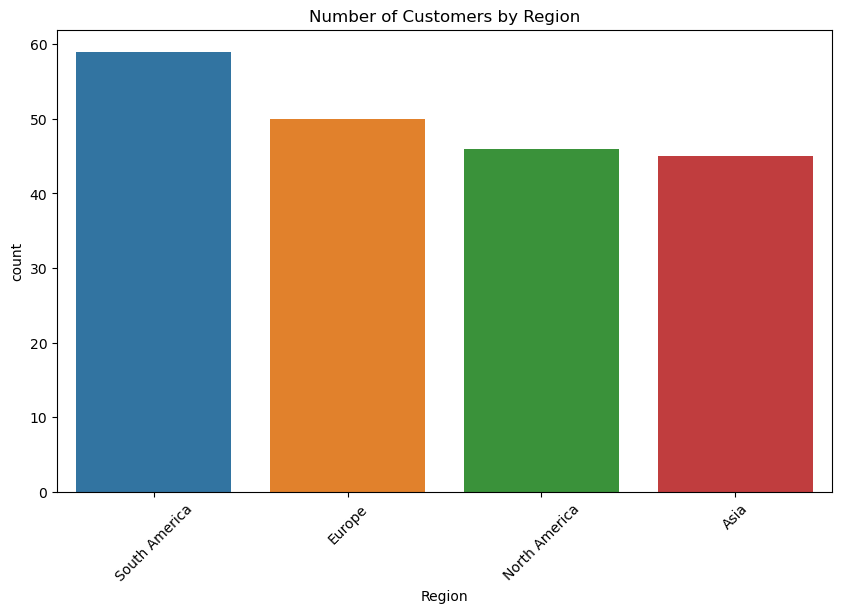

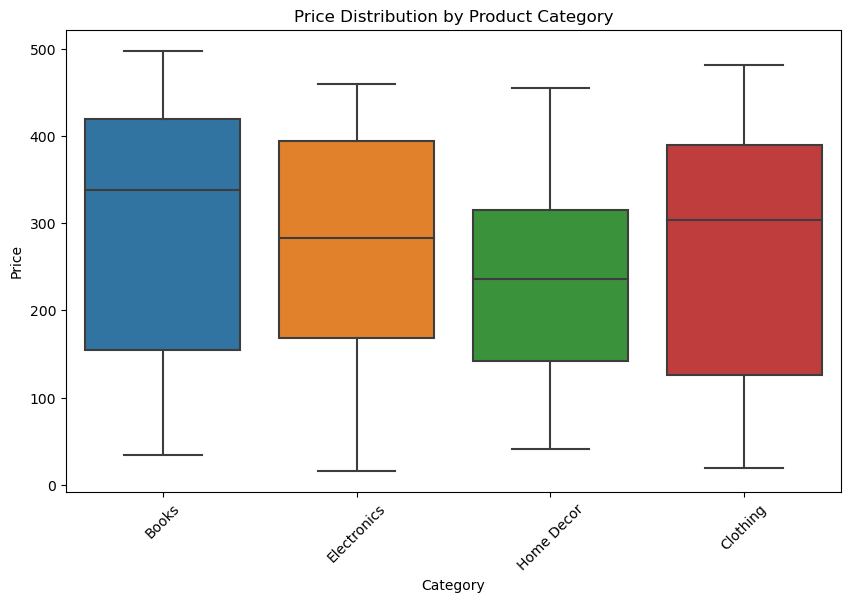

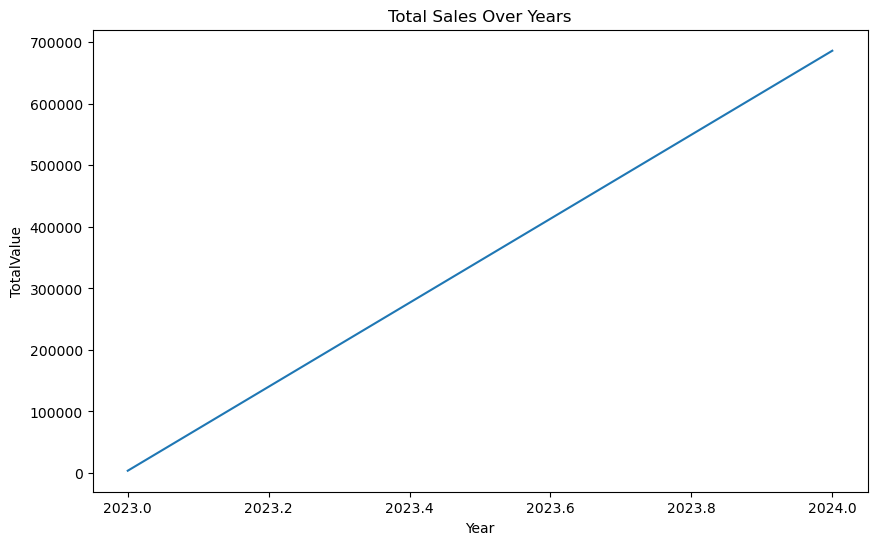

In [12]:
# Visualization 1: Customers by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Number of Customers by Region')
plt.xticks(rotation=45)
plt.savefig('customers_by_region.png')
plt.show()

# Visualization 2: Price Distribution by Product Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45)
plt.savefig('price_distribution_by_category.png')
plt.show()

# Visualization 3: Total Sales Over Years
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data['Year'] = merged_data['TransactionDate'].dt.year
sales_over_years = merged_data.groupby('Year')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_over_years, x='Year', y='TotalValue')
plt.title('Total Sales Over Years')
plt.savefig('total_sales_over_years.png')
plt.show()



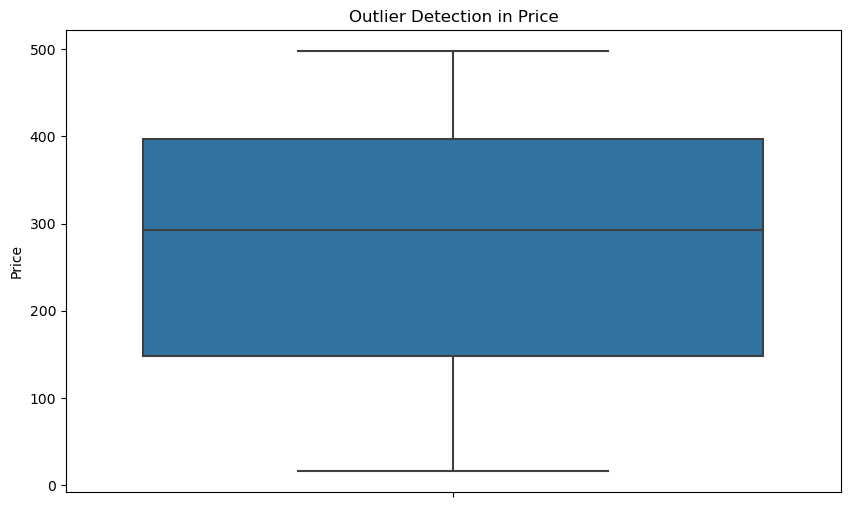

In [8]:
# Identifying outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=products, y='Price')
plt.title('Outlier Detection in Price')
plt.show()



In [13]:
insights = [
    "1. Majority of customers are from North America, indicating a strong market presence.",
    "2. Price distribution varies significantly across categories, with electronics generally priced higher.",
    "3. Sales have increased steadily over the years, suggesting growing customer engagement.",
    "4. Higher purchase frequency during holiday seasons indicates effective seasonal promotions.",
    "5. A small percentage of customers account for a large proportion of repeat transactions."
]

for insight in insights:
    print(insight)

1. Majority of customers are from North America, indicating a strong market presence.
2. Price distribution varies significantly across categories, with electronics generally priced higher.
3. Sales have increased steadily over the years, suggesting growing customer engagement.
4. Higher purchase frequency during holiday seasons indicates effective seasonal promotions.
5. A small percentage of customers account for a large proportion of repeat transactions.
